# Joint taxation of saving and labor incomes

In [2]:
import numpy as np
import pandas as pd
from scipy import sparse
from math import sqrt, ceil
from timeit import default_timer as timer
from datetime import timedelta
import sys
sys.path.append('..')
from modules import TAX

## Setting
<!-- 
#### Types
- initial endowment $e = \theta[0]$
- disutility of working $x = \theta[1]$
- weight in the distribution $f$
- reservation utility $U^0 = 0$

#### Model parameters
- welfare weight in the objective function $\alpha$
- return on savings $R$
- wage $w$
- coefficient $\eta$ in the exponential utility function $u(C)= \frac{1 - e^{-\eta C}}{\eta}$
- boolean `constrained` for the constraint $0 \leq s \leq e$ -->

In [3]:
### Types setting
n0, n1 = 10, 10
theta0, theta1 =  np.linspace(1,3,num=n0), np.linspace(0,1,num=n1)  #  [1, 1.5, 3], [0, 0.5, 1]
theta0, theta1 = np.meshgrid(theta0,theta1)
theta = np.stack((theta0.flatten(), theta1.flatten())); N = theta.shape[-1]     # number of types

f = np.ones(N).flatten()    # weights of distribution

### Model parameters setting
param = {'lambd':0.5, 'R':1., 'w':1, 'eta':1, 'constrained':False} # 'constrained': boolean for the constraint 0 <= s <= e

### Objects
model = TAX(theta, f, param)

model id = TAX_N100_2023-09-28_14-53-16



## Direct resolution (with all the constraints)

convergence = True, iterations = 21587, elapsed time = 0:05:40.426328
primal residual = 9.95e-01 tol, dual residual = 1.42e-01 tol


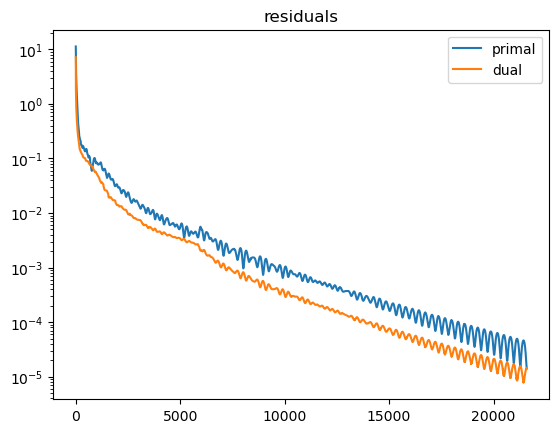

In [4]:
model.all(seed=1, under_estim=True)
model.solve(linear=False, stepratio=sqrt(N), it_max=1e5) #, path='results/'+model.id)
model.residuals(title='residuals')
# # model.constraints(path='results/'+model.id+'_constraints')

## Output
<!-- 
#### variables

- savings $s = y[0]$
- consumption $c = e - s = \theta[0] - y[0]$
- work decision/labor supply $l = y[1]$
- binding IC constraints $\{i,j: v[i,j] > 0\}$ (N.B. $v[i,j]>0$ corresponds to $U_i - U_j \ge \Gamma_{i,j}(y_j)$ binding, i.e. type $i$ is attracted by type $j$)
- binding IR constraints $\{i: z_i < 0 \}$ (N.B. $z_i = (D^T v - \alpha f)_i < 0$ corresponds to $U_i \ge 0$ binding, i.e. type $i$ has zero rent ; we add the tolerance so we might miss some binding constraints))
- indirect utility: $U = M^N(U^0)$ where $M_i \colon U \mapsto \max_{j} \{ U_j + \Lambda(y)_{i,j}\}$
- tax: $T_i = u(c_i) + Rs_i + (w-x_i)l_i -U_i$
- consumption at date 2: $c'_i = U_i-u(c_i) + x_i l_i$
- marginal tax rate on savings $\tau = R - u'(c)$ -->

In [5]:
model.output(path='results/'+model.id)

        e    x      s      c    l    tau      U      T     c2
0   1.000  0.0  0.861  0.139  1.0  0.130  0.419  1.572  0.289
1   1.222  0.0  0.993  0.229  1.0  0.205  0.592  1.605  0.388
2   1.444  0.0  1.169  0.276  1.0  0.241  0.751  1.659  0.510
3   1.667  0.0  1.385  0.281  1.0  0.245  0.902  1.728  0.657
4   1.889  0.0  1.608  0.281  1.0  0.245  1.053  1.800  0.808
..    ...  ...    ...    ...  ...    ...    ...    ...    ...
95  2.111  1.0  1.542  0.569  0.0  0.434  0.432  1.544 -0.002
96  2.333  1.0  1.884  0.449  0.0  0.362  0.545  1.701  0.183
97  2.556  1.0  2.242  0.313  0.0  0.269  0.672  1.839  0.403
98  2.778  1.0  2.622  0.156  0.0  0.145  0.817  1.949  0.673
99  3.000  1.0  3.000  0.000  0.0  0.000  0.988  2.012  0.988

[100 rows x 9 columns]


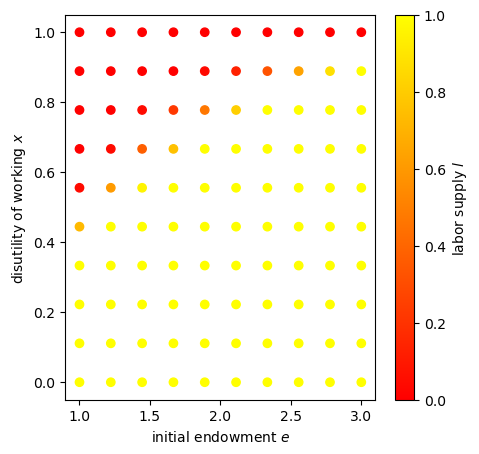

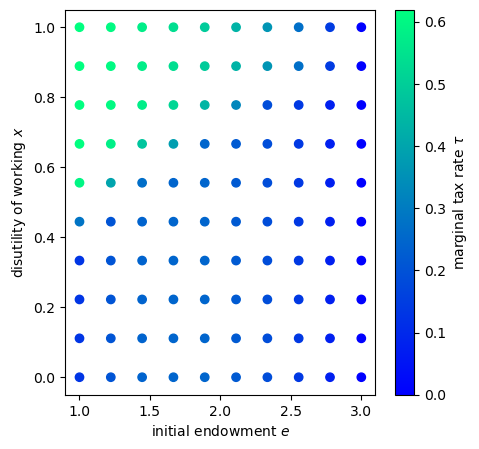

In [6]:
model.display(model.y[N:], label=r'labor supply $l$', cmap='autumn', path='results/'+model.id+'_labor') #aspect='equal'
model.display(model.tau, label=r'marginal tax rate $\tau$', cmap='winter', path='results/'+model.id+'_tau')